# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [3]:
df = pd.read_csv("Frozen_Dessert_Production.csv",
                 index_col=0,
                 parse_dates=True)

In [4]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [5]:
df.rename(columns={"IPN31152N": "Production"}, inplace=True)
# df.index = df.iloc[:,0]
# df.index

In [6]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Production,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


In [9]:
df.shape

(573, 1)

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

Production    573
dtype: int64

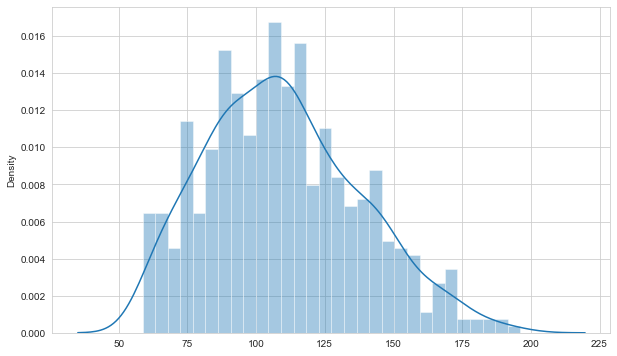

In [12]:
sns.distplot(df, bins = 30);

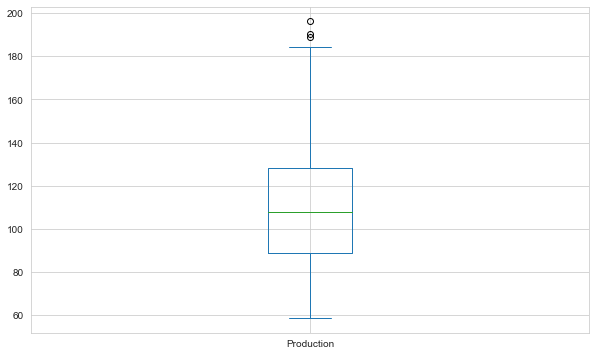

In [13]:
df.plot(kind = 'box');

In [14]:
df.tail(60)

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


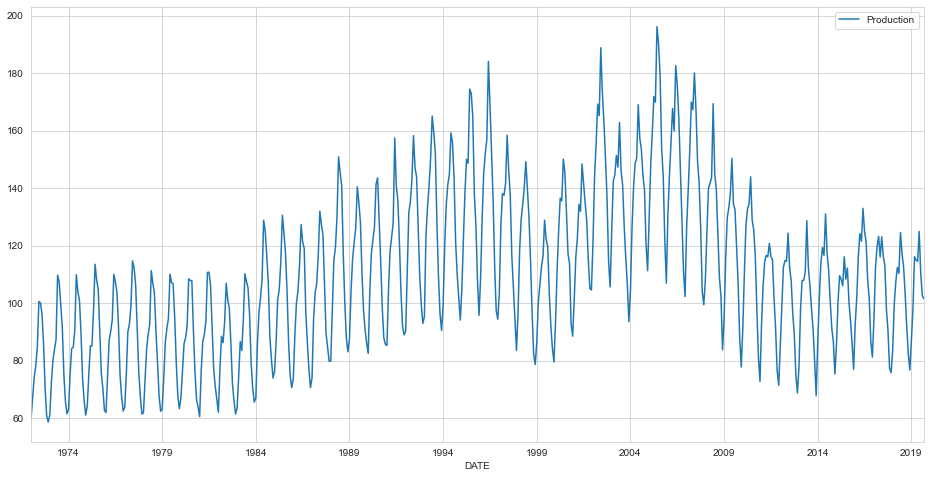

In [15]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [16]:
len(df)

573

In [17]:
test_size = 60

In [18]:
test_ind = len(df)- test_size
test_ind

513

In [19]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [20]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2014-05-01,116.631
2014-06-01,131.040
2014-07-01,117.272


In [21]:
test

,Production
DATE,
2014-10-01,91.261
2014-11-01,86.572
2014-12-01,75.375
2015-01-01,85.577
2015-02-01,100.558
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058
2015-06-01,116.138


### Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [24]:
from tensorflow import keras 
from keras import preprocessing  
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
length = 48
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [26]:
len(generator)

465

In [27]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133],
         [0.18358944],
         [0.20878908],
         [0.37150354],
         [0.3542551 ],
         [0.29817568],
         [0.23973867],
         [0.12104304],
         [0.05289938],
         [0.02087498],
         [0.03141355],
         [0.12133246],
         [0.18622481],
         [0.18855185],
         [0.23182893],
         [0.37263651],
         [0.32891584],
         [0.30809031],
         [0.22409662],
         [0.10933731],
         [0.05452176],
         [0.01749278],
         [0.04076752],
         [0.12186114],
         [0.19277469],
         [0.19221257],
         [0.28139264],
         [0.39898221],
         [0.35985962],
         [0

In [28]:
X, y = generator[0]

In [29]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.
 0.01774221 0.09850931 0.15590133 0.18358944 0.20878908 0.37150354
 0.3542551  0.29817568 0.23973867 0.12104304 0.05289938 0.02087498
 0.03141355 0.12133246 0.18622481 0.18855185 0.23182893 0.37263651
 0.32891584 0.30809031 0.22409662 0.10933731 0.05452176 0.01749278
 0.04076752 0.12186114 0.19277469 0.19221257 0.28139264 0.39898221
 0.35985962 0.3357137  0.22874706 0.12405219 0.08404241 0.02969736]
Predict this y: 
 [[0.02386668]]


## Modelling & Model Performance

### Import related libraries

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
train_scaled.shape

(513, 1)

In [32]:
n_features = train_scaled.shape[1]

In [33]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.Adam(learning_rate=0.003)

In [53]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) # return_sequences=True 2 tane RNN ard arda göndereceksem bunu true yap
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = optimizer, loss = 'mse')

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 48, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [55]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights=True)

In [56]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [57]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
465/465 [==============================] - 16s 27ms/step - loss: 0.0276 - val_loss: 0.0025
Epoch 2/20
465/465 [==============================] - 12s 26ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 3/20
465/465 [==============================] - 13s 29ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 4/20
465/465 [==============================] - 15s 33ms/step - loss: 0.0037 - val_loss: 0.0129
Epoch 5/20
465/465 [==============================] - 14s 29ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 6/20
465/465 [==============================] - 14s 29ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 7/20
465/465 [==============================] - 14s 30ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 8/20
465/465 [==============================] - 15s 32ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 9/20
465/465 [==============================] - 15s 31ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 10/20
465/465 [==============================] - 14s 31ms/step - loss: 0.003

<AxesSubplot:>

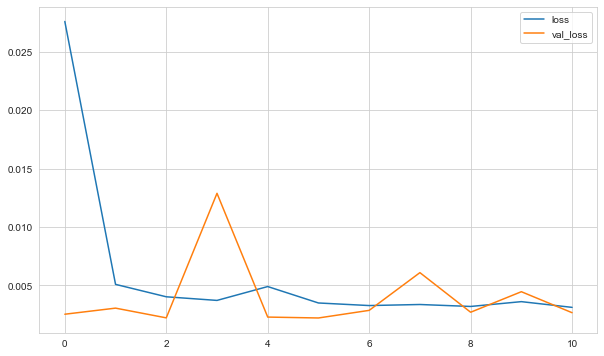

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate on Test Data

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [61]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [62]:
predictions_scaled


[array([0.23048295], dtype=float32),
 array([0.18649216], dtype=float32),
 array([0.19319525], dtype=float32),
 array([0.25053632], dtype=float32),
 array([0.3211808], dtype=float32),
 array([0.3712381], dtype=float32),
 array([0.41596764], dtype=float32),
 array([0.4631486], dtype=float32),
 array([0.48703796], dtype=float32),
 array([0.4736511], dtype=float32),
 array([0.43460828], dtype=float32),
 array([0.381119], dtype=float32),
 array([0.32437205], dtype=float32),
 array([0.28002352], dtype=float32),
 array([0.26342952], dtype=float32),
 array([0.28218687], dtype=float32),
 array([0.32765657], dtype=float32),
 array([0.37817818], dtype=float32),
 array([0.4215868], dtype=float32),
 array([0.4599775], dtype=float32),
 array([0.4883213], dtype=float32),
 array([0.49487597], dtype=float32),
 array([0.47716135], dtype=float32),
 array([0.44184285], dtype=float32),
 array([0.39800835], dtype=float32),
 array([0.35682482], dtype=float32),
 array([0.33038354], dtype=float32),
 array([0.

In [63]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.10698431147217224 
mae: 0.08037783640330017 
mse: 0.010815877338353161 
rmse: 0.10399941027887206


#### Inverse Transformations and Comparing

In [64]:
predictions = scaler.inverse_transform(predictions_scaled)

In [65]:
compare = test[:48]

In [66]:
compare['Predictions'] = predictions

In [67]:
compare

,Production,Predictions
DATE,,
2014-10-01,91.261,90.354
2014-11-01,86.572,84.305
2014-12-01,75.375,85.227
2015-01-01,85.577,93.112
2015-02-01,100.558,102.827
2015-03-01,109.579,109.710
2015-04-01,108.362,115.861
2015-05-01,106.058,122.349
2015-06-01,116.138,125.634


<AxesSubplot:xlabel='DATE'>

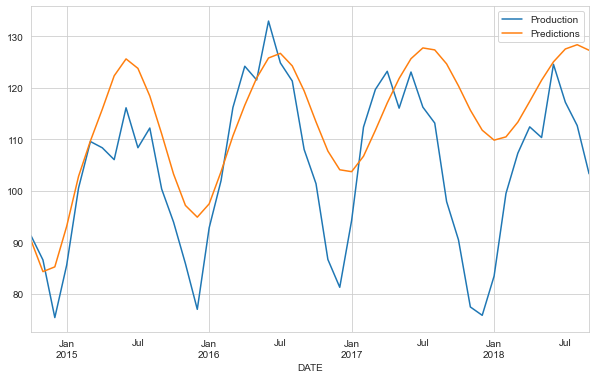

In [68]:
compare.plot()

#### Calculation R2 Score and Error Metrics

In [69]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.10698431147217302 
mae: 11.053069757379774 
mse: 204.5290267091009 
rmse: 14.301364505147783


### with "relu" activation function

In [78]:
model_relu = Sequential()
model_relu.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features))) # return_sequences=True 2 tane RNN ard arda göndereceksem bunu true yap
model_relu.add(LSTM(50, activation = 'relu'))
model_relu.add(Dense(1))
model_relu.compile(optimizer = optimizer, loss = 'mse')

In [79]:
model_relu.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
465/465 [==============================] - 16s 28ms/step - loss: 0.0393 - val_loss: 0.0112
Epoch 2/20
465/465 [==============================] - 13s 29ms/step - loss: 0.0222 - val_loss: 0.0029
Epoch 3/20
465/465 [==============================] - 14s 30ms/step - loss: 0.0051 - val_loss: 0.0025
Epoch 4/20
465/465 [==============================] - 14s 30ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 5/20
465/465 [==============================] - 14s 29ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 6/20
465/465 [==============================] - 14s 31ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 7/20
465/465 [==============================] - 13s 29ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 8/20
465/465 [==============================] - 14s 30ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 9/20
465/465 [==============================] - 14s 31ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 10/20
465/465 [==============================] - 14s 29ms/step - loss: 0.002

<AxesSubplot:>

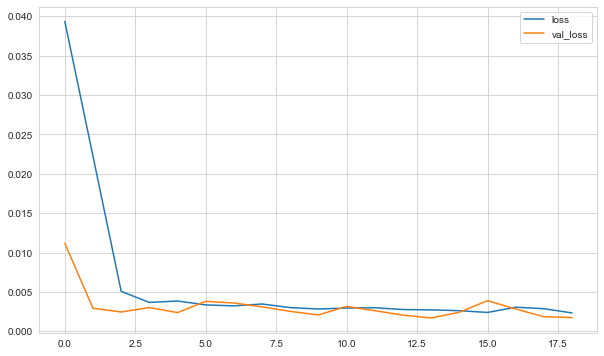

In [80]:
loss_df1 = pd.DataFrame(model_relu.history.history)
loss_df1.plot()

#### Evaluate on Test Data

In [81]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model_relu.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [82]:
predictions_scaled

[array([0.21970172], dtype=float32),
 array([0.17907912], dtype=float32),
 array([0.18812111], dtype=float32),
 array([0.26703775], dtype=float32),
 array([0.35324103], dtype=float32),
 array([0.40539962], dtype=float32),
 array([0.44065666], dtype=float32),
 array([0.47647667], dtype=float32),
 array([0.47186965], dtype=float32),
 array([0.41320962], dtype=float32),
 array([0.32718164], dtype=float32),
 array([0.24160767], dtype=float32),
 array([0.18175381], dtype=float32),
 array([0.1609493], dtype=float32),
 array([0.21156803], dtype=float32),
 array([0.30413687], dtype=float32),
 array([0.37366158], dtype=float32),
 array([0.40358245], dtype=float32),
 array([0.44786972], dtype=float32),
 array([0.46529114], dtype=float32),
 array([0.43182945], dtype=float32),
 array([0.35375023], dtype=float32),
 array([0.26675195], dtype=float32),
 array([0.19343287], dtype=float32),
 array([0.15625134], dtype=float32),
 array([0.17235371], dtype=float32),
 array([0.25623745], dtype=float32),
 a

In [83]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.14126337087067264 
mae: 0.0845023961131887 
mse: 0.010400701987582436 
rmse: 0.10198383199106825


#### Inverse Transformations and Comparing

In [84]:
predictions = scaler.inverse_transform(predictions_scaled)

In [85]:
compare_r = test[:48]

In [86]:
compare_r['Predictions'] = predictions

In [87]:
compare_r

,Production,Predictions
DATE,,
2014-10-01,91.261,88.872
2014-11-01,86.572,83.286
2014-12-01,75.375,84.529
2015-01-01,85.577,95.381
2015-02-01,100.558,107.235
2015-03-01,109.579,114.408
2015-04-01,108.362,119.256
2015-05-01,106.058,124.182
2015-06-01,116.138,123.548


<AxesSubplot:xlabel='DATE'>

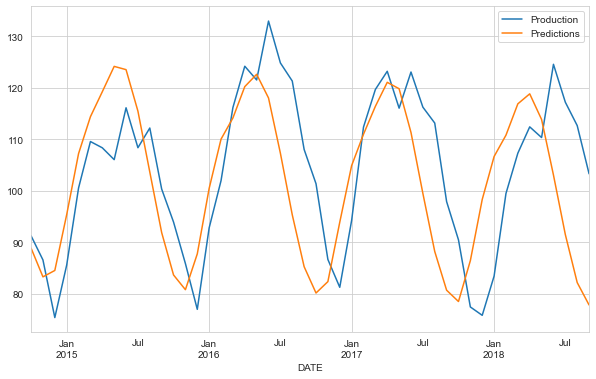

In [88]:
compare_r.plot()

#### Calculation R2 Score and Error Metrics

In [89]:
eval_metrics(compare_r.Production, compare_r.Predictions)

r2_score: 0.14126337087067253 
mae: 11.62025404886942 
mse: 196.6780306455977 
rmse: 14.024194474036564


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [90]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [91]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [92]:
len(df)

573

In [93]:
len(generator) 

525

In [110]:
final_model = Sequential()
final_model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
final_model.add(LSTM(50, activation = 'relu'))
final_model.add(Dense(1))
final_model.compile(optimizer = optimizer, loss = 'mse')

final_model.fit_generator(generator, epochs=15)

Epoch 1/15
525/525 [==============================] - 19s 32ms/step - loss: 0.7085
Epoch 2/15
525/525 [==============================] - 17s 32ms/step - loss: 0.0352
Epoch 3/15
525/525 [==============================] - 21s 40ms/step - loss: 0.0291
Epoch 4/15
525/525 [==============================] - 14s 27ms/step - loss: 0.0277
Epoch 5/15
525/525 [==============================] - 17s 33ms/step - loss: 0.0265
Epoch 6/15
525/525 [==============================] - 14s 26ms/step - loss: 0.0265
Epoch 7/15
525/525 [==============================] - 15s 28ms/step - loss: 0.0263
Epoch 8/15
525/525 [==============================] - 15s 28ms/step - loss: 0.0254
Epoch 9/15
525/525 [==============================] - 14s 27ms/step - loss: 0.0245
Epoch 10/15
525/525 [==============================] - 15s 28ms/step - loss: 0.0182
Epoch 11/15
525/525 [==============================] - 13s 25ms/step - loss: 0.0061
Epoch 12/15
525/525 [==============================] - 13s 24ms/step - loss: 0.0045
E

In [111]:
scaled_full_data.shape

(573, 1)

In [112]:
scaled_full_data[-length:].shape

(48, 1)

In [113]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = final_model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [114]:
forecast = scaler.inverse_transform(forecast)

In [115]:
forecast

array([[ 88.81833618],
       [ 83.73985225],
       [ 84.72626224],
       [ 90.45482437],
       [ 98.47145079],
       [106.65816416],
       [113.44892081],
       [118.36050212],
       [119.73945527],
       [116.43030787],
       [108.67988426],
       [ 98.39084674],
       [ 88.79758887],
       [ 83.21105513],
       [ 83.87732545],
       [ 89.56757319],
       [ 97.76119823],
       [106.25677087],
       [113.38107045],
       [118.52572651],
       [120.24680429],
       [117.25845023],
       [109.65903423],
       [ 99.24920537],
       [ 89.26753536],
       [ 83.1078616 ],
       [ 83.26353506],
       [ 88.72124288],
       [ 96.89667175],
       [105.5421209 ],
       [112.91145387],
       [118.27502526],
       [120.36714892],
       [117.79690894],
       [110.50341788],
       [100.14062855],
       [ 89.89898095],
       [ 83.25126085],
       [ 82.83504219],
       [ 87.96930513],
       [ 96.02526845],
       [104.72599046],
       [112.27861693],
       [117

In [116]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [117]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS') # MS mounth allias stock owerflow started month allias bakabilirsin

In [118]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [119]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [120]:
forecast_df

,Forecast
2019-10-01,88.818
2019-11-01,83.740
2019-12-01,84.726
2020-01-01,90.455
2020-02-01,98.471
2020-03-01,106.658
2020-04-01,113.449
2020-05-01,118.361
2020-06-01,119.739
2020-07-01,116.430


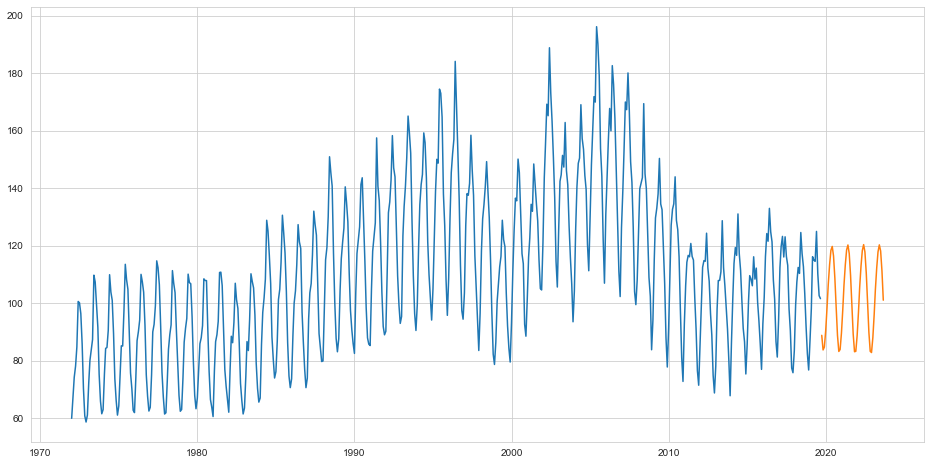

In [121]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [122]:
forecast_df

,Forecast
2019-10-01,88.818
2019-11-01,83.740
2019-12-01,84.726
2020-01-01,90.455
2020-02-01,98.471
2020-03-01,106.658
2020-04-01,113.449
2020-05-01,118.361
2020-06-01,119.739
2020-07-01,116.430


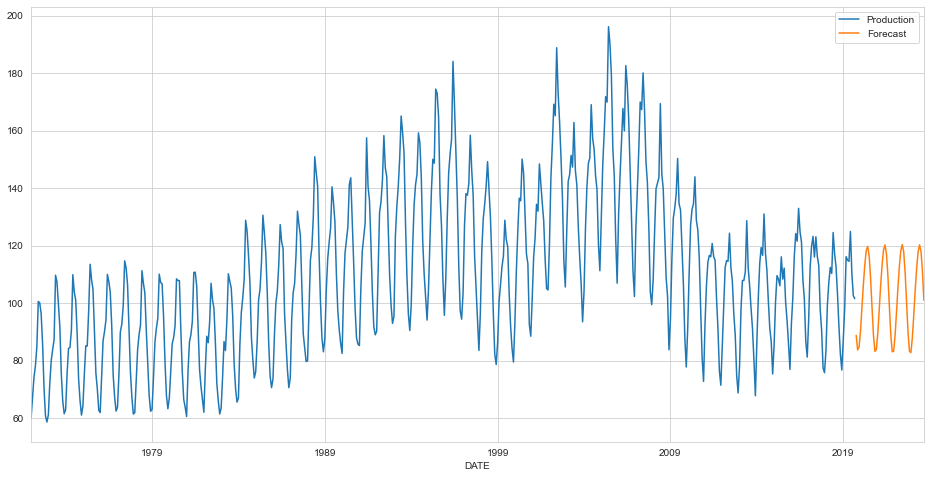

In [123]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8)); 

(576.0, 611.0)

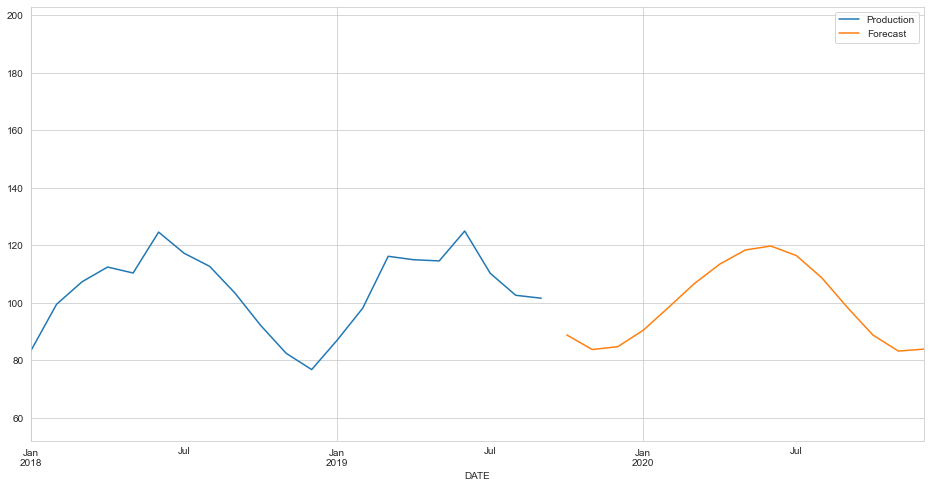

In [124]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

<AxesSubplot:>

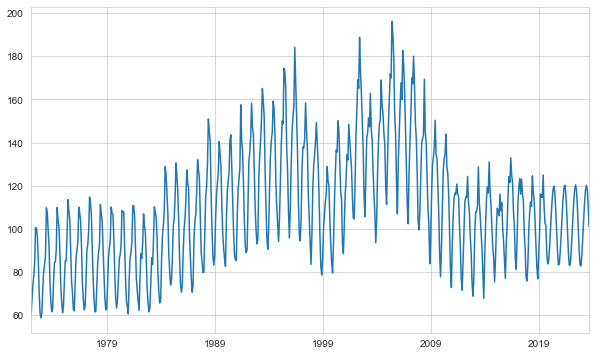

In [125]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)
dataset_total.plot()